#숨기기

In [117]:
# 코랩 ver.
# 새로운 환경에선 계속 설치해줘야함
# 같은 환경에서 두번 이상 설치하면 깨져서 나옴
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm -rf ~/.cache/matplotlib
# 설치 후 반드시 런타임 재시작

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 0s (49.3 MB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 128276 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
Setting up fonts-nanum (20180306-3) ...
Processing triggers for fontconfig (2.13.1-2ubuntu3) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

# 기본 코드

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#마이너스 표시
mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='NanumBarunGothic')

In [2]:
import numpy as np
import pandas as pd

# 연습

In [ ]:
# mpg 데이터 불러오기
# df.columns = ['mpg', 'cylinders', 'displacement','horsepower','weight',
#               'acceleration','model year', 'origin', 'name']

In [5]:
# mpg 데이터 불러오기
df = pd.read_csv("auto-mpg.csv", header=None)
df.columns = ['mpg', 'cylinders', 'displacement','horsepower','weight',
              'acceleration','model year', 'origin', 'name']
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


<Axes: >

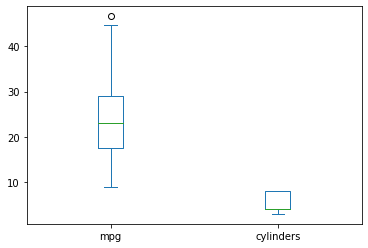

In [8]:
# mpg와 cylinders 의 boxplot
df[['mpg','cylinders']].plot(kind='box')

<Axes: ylabel='Frequency'>

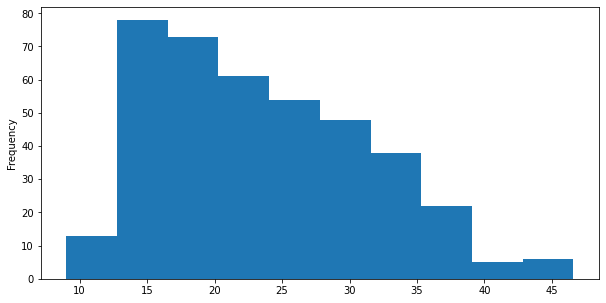

In [15]:
# 히스토그램 그리기
# 구간 = 10, 색 지정, 그림 사이즈 10,5

df['mpg'].plot(kind='hist',bins=10,figsize=(10,5))

<function matplotlib.pyplot.show(close=None, block=None)>

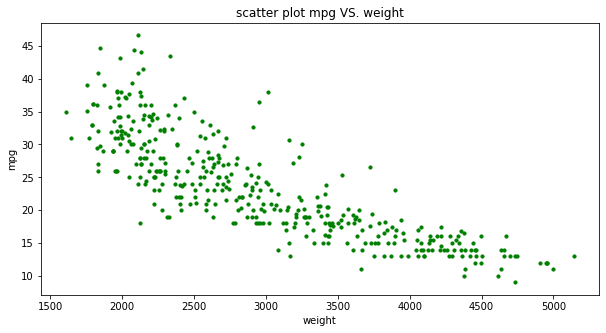

In [24]:
# 산점도 scatter 그리기
# x축 weight, y축 mpg / 색 지정, 사이즈 10, 그림사이즈 10,5
# 차트 제목 'scatter plot mpg VS. weight'

df.plot(x='weight',y='mpg',kind='scatter', color='g', s=10, figsize=(10,5))
plt.title('scatter plot mpg VS. weight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

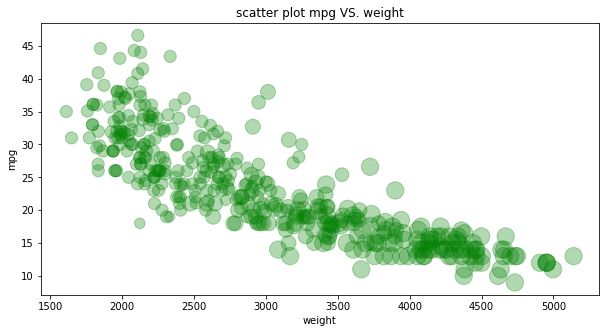

In [27]:
# 버블차트 그리기
# 버블차트를 그리기 위해 cylinder 개수의 상대적 비율을 계산하여 시리즈 생성
cylinder_size = df.cylinders / df.cylinders.max() * 300
# 산점도 그리기 (cylinder 크기 이용), 투명도 0.3
# 차트 제목 'scatter plot : mpg-weight-cylinders'

df.plot(x='weight',y='mpg',kind='scatter', color='g', s=cylinder_size, figsize=(10,5), alpha=0.3)
plt.title('scatter plot mpg VS. weight')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

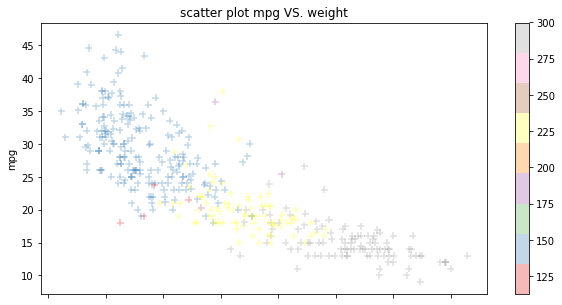

In [32]:
# 3개의 변수로 산점도 그리기
# 산점도 그리기 (cylinder 크기 이용), 투명도 0.3, 크기 50
# +마커, 오른쪽 네모 박스 색 지정

df.plot(x='weight',y='mpg',kind='scatter', color=cylinder_size, s=50, figsize=(10,5), 
        alpha=0.3, marker='+', cmap='Set1')
plt.title('scatter plot mpg VS. weight')
plt.show

In [41]:
df['count']=1
df_origin=df.groupby('origin').sum()
df_origin.index=['USA', 'EU', 'JAPAN']
df_origin

,mpg,cylinders,displacement,weight,acceleration,model year,count
USA,5000.8,1556,61229.5,837121.0,3743.4,18827,249
EU,1952.4,291,7640.0,169631.0,1175.1,5307,70
JAPAN,2405.6,324,8114.0,175477.0,1277.6,6118,79


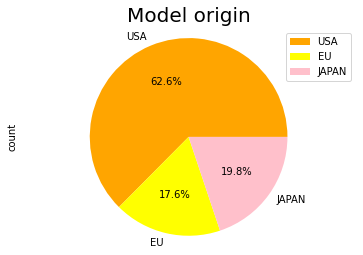

In [49]:
# count열의 파이 차트 그리기
# 그림사이즈 7,5, 값 표시는 소수점 첫째자리 %로 표시
# 파이조각을 나는 시작 점 (각도 표시) 10
# 색 지정
# 차트 제목 'Model origin', 크기 20
# 파이 차트의 비율을 같게(원에 가깝게) 조정 (원의 형태를 유지할 수 있도록)
# 범례는 인덱스가 표시되게, 위치는 오른쪽 위에

df_origin['count'].plot(kind='pie', autopct='%1.1f%%', colors=['orange','yellow','pink'])

plt.title('Model origin', size=20)
plt.axis('equal')
plt.legend(labels=df_origin.index, loc='upper right')
plt.show()

Text(0.5, 1.0, '1. 제조국가별 연비분포(수직박스)')

/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 51228 (\N{HANGUL SYLLABLE JE}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 51312 (\N{HANGUL SYLLABLE JO}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.9/dist-packages/IPython/core/events.py:88: UserWarning: Glyph 50672 (\N{HANGUL SYLLABLE YEON}) missing from current font.
  func(*args, **

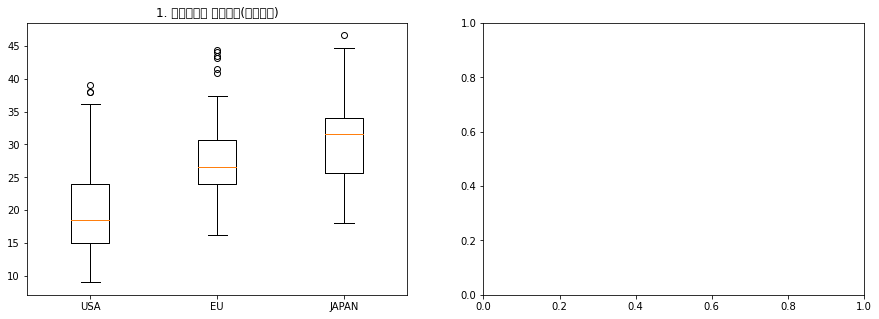

In [57]:
# box plot
# 그림 사이즈 가로 15인치, 세로 5인치 지정
# 2개 그래프 그리기
# 1. origin 별로 mpg 박스플롯
# 2. 박스플롯 옆으로 그리기
# 차트 제목 1. 제조국가별 연비분포(수직박스) / 2. 제조국가별 연비분포(수평박스)

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.boxplot(x= [df[df['origin']==1]['mpg'],
                df[df['origin']==2]['mpg'],
                df[df['origin']==3]['mpg']],
            labels=df_origin.index)
ax1.set_title('1. 제조국가별 연비분포(수직박스)')

In [3]:
# 시도별 전출입 인구수 데이터 불러오기
# engine = "openpyxl"
# 행 열의 개수, 정보, 기술통계 확인
# 결측값 앞의 값으로 채워넣기
df = pd.read_excel("시도별 전출입 인구수.xlsx")
df.fillna(method='ffill', inplace=True)
df.head()

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,전출지별,전입지별,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182


In [4]:
# 서울에서 다른 지역으로 이동한 데이터만 추출
# 전출지별 열 삭제
# 전입지별 -> 전입지로 열이름 변경
# 전입지 열을 인덱스로 지정
df_seoul=df[(df['전출지별']=='서울특별시')&(df['전입지별']!='서울특별시')]
df_seoul.drop(['전출지별'],axis=1, inplace=True)
df_seoul.rename(columns={'전입지별':'전입지'}, inplace=True)
df_seoul.set_index('전입지',inplace=True)
df_seoul.head()

<ipython-input-4-2989334c0690>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.drop(['전출지별'],axis=1, inplace=True)
<ipython-input-4-2989334c0690>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_seoul.rename(columns={'전입지별':'전입지'}, inplace=True)


,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지,,,,,,,,,,,,,,,,,,,,,
전국,1448985,1419016,1210559,1647268,1819660,2937093,2495620,2678007,3028911,2441242,...,2083352,1925452,1848038,1834806,1658928,1620640,1661425,1726687,1655859,1571423
부산광역시,11568,11130,11768,16307,22220,27515,23732,27213,29856,28542,...,17353,17738,17418,18816,16135,16153,17320,17009,15062,14484
대구광역시,-,-,-,-,-,-,-,-,-,-,...,9720,10464,10277,10397,10135,10631,10062,10191,9623,8891
인천광역시,-,-,-,-,-,-,-,-,-,-,...,50493,45392,46082,51641,49640,47424,43212,44915,43745,40485
광주광역시,-,-,-,-,-,-,-,-,-,-,...,10846,11725,11095,10587,10154,9129,9759,9216,8354,7932


In [5]:
# 서울에서 경기도로 이동한 인구 데이터 값만 선택
sr_one=df_seoul.loc["경기도"]
sr_one

1970    130149
1971    150313
1972     93333
1973    143234
1974    149045
1975    253705
1976    202276
1977    207722
1978    237684
1979    278411
1980    297539
1981    252073
1982    320174
1983    400875
1984    352238
1985    390265
1986    412535
1987    405220
1988    415174
1989    412933
1990    473889
1991    384714
1992    428344
1993    502584
1994    542204
1995    599411
1996    520566
1997    495454
1998    407050
1999    471841
2000    435573
2001    499575
2002    516765
2003    457656
2004    400206
2005    414621
2006    449632
2007    431637
2008    412408
2009    398282
2010    410735
2011    373771
2012    354135
2013    340801
2014    332785
2015    359337
2016    370760
2017    342433
Name: 경기도, dtype: object

Text(10, 800000, '인구이동증가(1970-1995)')

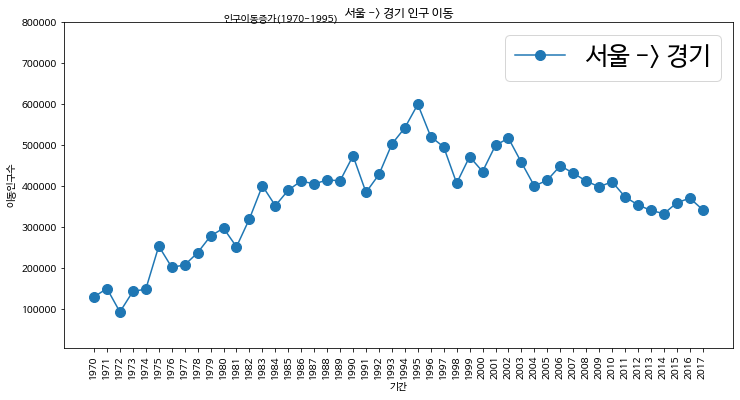

In [8]:
# 해당 데이터 그래프
# matplotlib 이용한 간단한 그래프 그리기
# 그림 사이즈 가로 12인치, 세로 6인치 지정
# 동그란 마커, 사이즈 10으로 그래프 그리기
# 차트 제목 추가 '서울 -> 경기 인구 이동'
# 축의 이름 지정하고 크기는 10으로
# x축 - 기간 / y축 - 이동인구수
# x축 눈금라벨 사이즈 10, 90도 회전
# y축 범위 5000~800000
# 범례 : '서울 -> 경기' 글씨 사이즈 25, 최적의 위치
# 주석 표시
# 주석 1 : "인구이동증가(1970-1995)" , 위치 기준점 10, 400000, 크기 20
# 주석 2 : "인구이동감소(1995-2017)" , 위치 기준점 40, 400000, 크기 20

fig=plt.figure(figsize=(12,6))
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10)
plt.title('서울 -> 경기 인구 이동')
plt.xlabel('기간', size=10)
plt.ylabel('이동인구수', size=10)
plt.xticks(size=10, rotation=90 )
plt.ylim(5000,800000)
plt.legend(labels=['서울 -> 경기'], fontsize=25, loc='best')
plt.annotate("인구이동증가(1970-1995)",xy = (10, 800000))

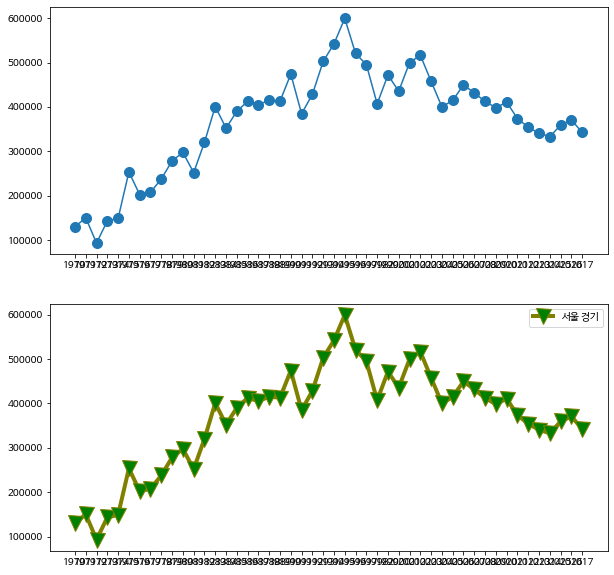

In [15]:
# 그림 사이즈 가로 10인치, 세로 10인치 지정
# 2개 그래프 그리기
# 1. 동그란 마커, 사이즈 10
# 2. 세모난 마커, 마커 색 그린, 사이즈 15, 선 색 올리브, 
# 선 굵기 4, 범례에 표시되는 서울-> 경기
# 범례 위치 최적
# 2개 그래프 y축 범위 지정 50000~800000
# x축 내용 표시, 75도 회전

fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.plot(sr_one, marker='o', markersize=10)
ax2.plot(sr_one, marker='v',markersize=15, markerfacecolor='g', color='olive', linewidth=4, label='서울 경기')

ax2.legend(loc='best')

plt.show()

In [20]:
df3 = df_seoul.loc[['충청남도', '경상북도', '강원도']]
df3.head()
df4 = df_seoul.loc[['충청남도', '경상북도', '강원도', '전라남도']]
df4.head()
col_years = df3.columns

In [ ]:
plt.style.use('ggplot')

# 그림 사이즈 가로 20인치, 세로 5인치 지정
# 한 도화지에 4개 그래프 겹쳐서 그리기
# 동그란 마커, 크기 10, 선 굵기 2, 색 지정, 범례에 표시되는 서울 -> 00
# 범례 최적의 위치에 나오게
# 그래프 제목 '서울->충남, 경북, 강원, 전남 인구이동', 크기 20
# x축 - 기간 / y축 - 이동인구수
# x축 눈금라벨 90도 회전

fig = plt.figure(figsize=(20,5))
ax1=

<ipython-input-24-a9882d22d733>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(col_years, rotation = 90)


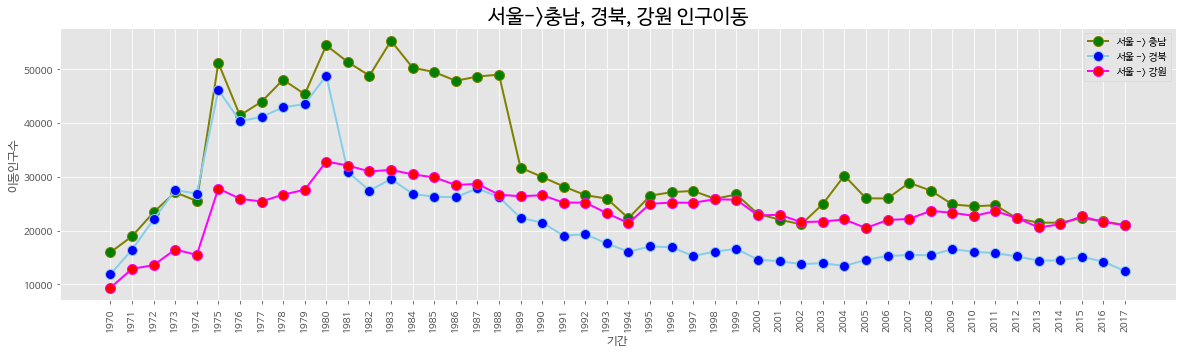

In [24]:
plt.style.use('ggplot') # 회색 배경에 눈금표시 나오는 테마
fig = plt.figure(figsize=(20,5))
ax = fig.add_subplot(1,1,1)
ax.plot(col_years, df3.loc['충청남도', :], marker='o', markerfacecolor='green',
        markersize=10, color ="olive", linewidth=2, label='서울 -> 충남')
ax.plot(col_years, df3.loc['경상북도', :], marker='o', markerfacecolor='blue',
        markersize=10, color ="skyblue", linewidth=2, label='서울 -> 경북')
ax.plot(col_years, df3.loc['강원도', :], marker='o', markerfacecolor='red',
        markersize=10, color ="magenta", linewidth=2, label='서울 -> 강원')
ax.legend(loc="best")
ax.set_title('서울->충남, 경북, 강원 인구이동', size=20)
ax.set_xlabel('기간',size=12)
ax.set_ylabel('이동인구수',size=12)
ax.set_xticklabels(col_years, rotation = 90)
plt.show()

AttributeError: ignored

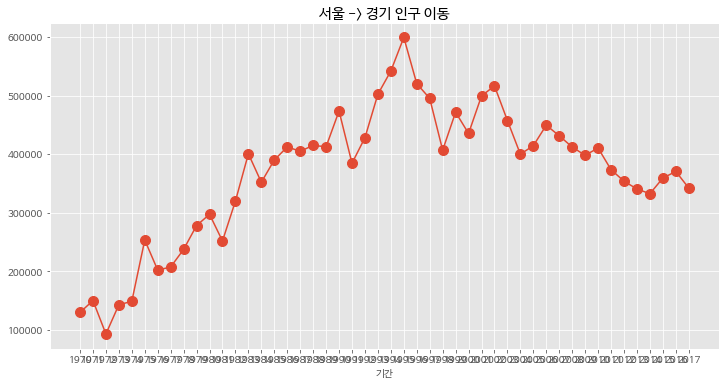

In [26]:
# 위키독스 https://wikidocs.net/book/5011 참고
plt.figure(figsize=(12,6)) # 그림사이즈(가로인치, 세로인치)
plt.plot(sr_one.index, sr_one.values, marker='o', markersize=10) 
# marker = "^" - 삼각형
# marker = "s" - 사각형

# 차트의 제목을 추가
plt.title('서울 -> 경기 인구 이동')
# 축의 이름
plt.xlabel('기간', size = 10) # x축 라벨이름 다음에 라벨사이즈 입력
plt.xticklabels(col_years, size = 10, rotation='vertical') # x축 눈금라벨 사이즈
plt.ylabel('이동인구수', size = 10) # y축 라벨이름 다음에 라벨사이즈 입력
plt.ylim(5000,800000) # y축의 범위지정 (최소값, 최대값)
# 범례
plt.legend(fontsize = 25, labels=['서울 -> 경기'], loc = 'best')
# 'best'            0
# 'upper right'     1
# 'upper left'      2
# 'lower left'      3
# 'lower right'     4
# 'right'           5
# 'center left'     6
# 'center right'    7
# 'lower center'    8
# 'upper center'    9
# 'center'          10

# 주석표시
plt.annotate("인구이동증가(1970-1995)", # 텍스트 입력
             xy = (10, 400000),         # 텍스트 위치 기준점
             rotation = 20,             # 텍스트 회전 각도
             va = "baseline",           # 텍스트의 상하 정렬
             ha = 'center',             # 텍스트의 좌우 정렬
             fontsize = 20)

plt.annotate("인구이동감소(1995-2017)", # 텍스트 입력
             xy = (40, 400000),         # 텍스트 위치 기준점
             rotation = -20,            # 텍스트 회전 각도
             va = "baseline",           # 텍스트의 상하 정렬
             ha = 'center',             # 텍스트의 좌우 정렬
             fontsize = 20)

plt.show() # 변경사항을 저장하고 그래프로 출력
